![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/data_01.png)

## 本周摘要

- 推论统计学代码实现
- 项目四 2/3 部分

- ` 讲师个人主页：` www.zhang-ran.com

> 开始录屏

- 置信区间：对样本所在的总体的一个参数区间估计，在一定的置信水平的可信度下该区间内参数值可以被纳入其中范围
- 零假设：针对两个测量的现象是没有相关性的，或者是检验的样本和总体之间没有相关性
- 对立假设：它是和零假设的内容完全对立的假设
- 错误类型：

![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/%E9%94%99%E8%AF%AF%E7%B1%BB%E5%9E%8B.png)

- p 值：是一个概率值，它是样本所提供的证据时对零假设支持程度的度量
- 临界值：确定检验统计量的值是否小到足以拒绝原假设的一个基准。它是使得我们能够拒绝零假设的检验统计量的最大值

![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/p%E5%80%BC%E5%88%86%E5%B8%83.png)

In [1]:
# 根据P值计算Z得分

import scipy.stats as st
z = st.norm.ppf(1-0.05)
z

1.6448536269514722

> 假设检验流程
- 提出假设
- 指定检验中的显著水平
- 计算统计量（自助抽样）
- p值检验
- 得出结论

## 假设检验实践
- $H_0$ :
  - 在采集数据前，设定为真
  - 两组数据是具有相同效应或者效应为0
- $H_1$
  - 我们希望为真，或者希望证明为真的相关事件
    
- $H_0: = \  \leq \ \geq$
- $H_1: \neq \   >  \ <$

## 新老页面的点击率是否在新策略上有提升¶

`Q1:如果用文字来诉述该题的零假设，回答是？`

- 答：新页面的点击率在新策略上较老页面的点击率没有提升
- 老页面的点击率更好

`Q2:如果用文字来诉述该题的备选假设，回答是？`

- 答：新页面的点击率在新策略上较老页面的点击率有了提升
- 新页面的点击率更好

`Q3:请使用公式来完成零假设和备选假设`

- 设定:新页面点击率 μ-new , 老页面点击率 μ-old
- 零假设应为：新页面点击率小于等于老页面的

## 使用新老页面点击率来理解错误类型

`Q2：为什么I类错误比II类错误严重`

- 答：I类错误会使用比老页面点击率还要低的新页面替换，II类错误依旧沿用老页面，虽然点击率没有做到提升，但是没有I类错误带来的负面效果严重

### 使用样本自展来完成以下分析

- 喝咖啡人群的高度是否低于69
- 喝咖啡人群的身高是否比不喝咖啡人群的身高低

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(40)

In [22]:
full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)
sample_data.head()

,user_id,age,drinks_coffee,height
964,5527,>=21,True,68.683225
772,2938,>=21,True,69.380235
1118,2732,<21,False,67.600551
2185,5132,>=21,False,71.434736
876,4755,>=21,True,69.533103


#### 问题一的零假设和备选假设：

$$H_0: \mu_{coff}  ≧ 69 $$

$$H_1: \mu_{coff}  < 69 $$

In [23]:
# 计算出sample_data的喝咖啡的身高的平均值coff_means

coff_means = sample_data.query('drinks_coffee == True').height.mean()
coff_means

68.4540798796315

In [24]:
# 自展10000次，得出喝咖啡人群的平均身高存储在coff_means

coff_means = []
for _ in range(100):
    bootsamp = sample_data.sample(200, replace = True)
    coff_mean = bootsamp.query('drinks_coffee == True')['height'].mean()
    coff_means.append(coff_mean)

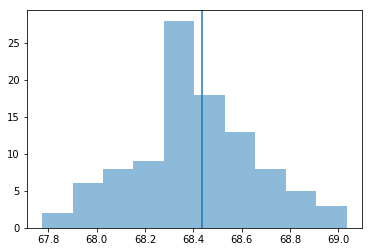

In [25]:
# 画出coff_means的hist()和67的位置

plt.hist(coff_means,alpha = .5);
plt.axvline(x = coff_mean);

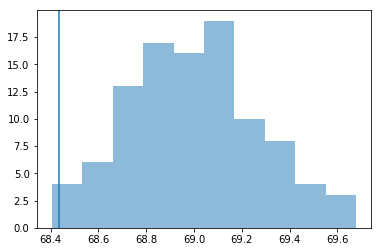

In [26]:
# 调整零假设中心至75，使用random.normal

null_vals = np.random.normal(69, np.std(coff_means), 100)
plt.hist(null_vals,alpha = .5);
plt.axvline(x = coff_mean);

In [27]:
# 求出 P值

(null_vals < coff_means).mean()

0.08

#### 问题二的设立零假设和备选假设：

$$H_0: \mu_{coff} - \mu_{no} ≧ 0 $$

$$H_1: \mu_{coff} - \mu_{no} < 0 $$

In [28]:
# 计算出sample_data的obs_diff值

coff_mean = sample_data[sample_data['drinks_coffee'] == True]['height'].mean()
nocoff_mean = sample_data[sample_data['drinks_coffee'] == False]['height'].mean()
obs_diff = coff_mean - nocoff_mean
obs_diff

1.4055389760942063

In [29]:
# 循环10000次，通过样本自展得出
# 喝咖啡人群的平均身高存储在coff_means，不喝咖啡人群的平均身高存储在nocoff_means，以及他们的diffs

nocoff_means, coff_means, diffs = [], [], []

for _ in range(100):
    bootsamp = sample_data.sample(200, replace = True)
    coff_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    nocoff_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    # append the info 
    coff_means.append(coff_mean)
    nocoff_means.append(nocoff_mean)
    diffs.append(coff_mean - nocoff_mean)

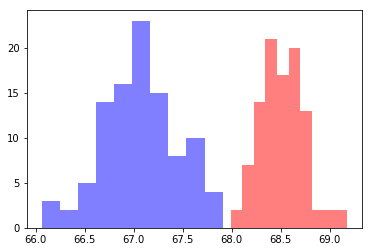

In [30]:
# 画出coff_means和nocoff_means的hist（）

plt.hist(coff_means, color = 'r', alpha = .5);
plt.hist(nocoff_means, color = 'b', alpha = .5);

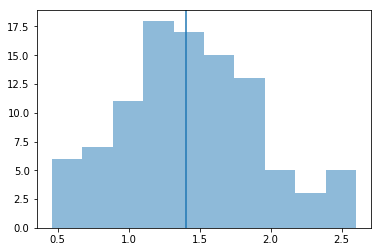

In [31]:
# 画出diffs的hist()和样品实际样品的obs_diff的line

plt.hist(diffs, alpha = .5);
plt.axvline(x = obs_diff);

In [32]:
# 计算obs_diffs在diffs分布上出现的P值

(np.array(diffs) < obs_diff).mean()

0.51

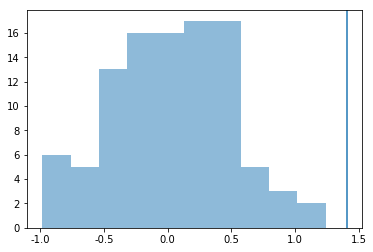

In [33]:
# 再次移动样品分布，根据零假设，移动diffs到0点
# 画出diffs的hist()和样品实际样品的obs_diff的line

null = np.random.normal(0, np.std(diffs),100)
plt.hist(null, alpha = .5);
plt.axvline(x = obs_diff);

In [34]:
# 再次计算P值

(null < obs_diff).mean()

1.0

In [35]:
import statsmodels.api as sm

coff = sample_data[sample_data['drinks_coffee'] == True]['height'].count()
uncoff = sample_data[sample_data['drinks_coffee'] == False]['height'].count()
n_coff = len(sample_data)
n_uncoff = len(sample_data)
coff,uncoff,n_coff,n_uncoff
z_score, p_value = sm.stats.proportions_ztest([coff, uncoff], [n_coff, n_uncoff], alternative = 'smaller')
z_score, p_value

(4.3999999999999995, 0.9999945874560923)

<a id='00'></a>

## 课件总目录

<ul>
<li><a href="#01">01：快速把握数据集概况</a></li>
<li><a href="#02">02：了解基于此数据集的分析结果和背景知识</a></li>
<li><a href="#03">03：使用Python呈现出此数据集的描述统计学特性</a></li>
<li><a href="#04">04：推论统计学应用之 A/B TEST</a></li>
</ul>

>- 不要直接粘贴复制此课件的代码到项目中，需要自己理解后独立完成
- 文件排版和锚链接

<a id='01'></a>
## 01：快速把握数据集概况

In [36]:
import pandas as pd
df = pd.read_csv('ab-data.csv')

In [37]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


涉及的变量有：用户ID、时间、组别：控制组和实验组、页面分组：旧页面和新页面、是否转化

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


<ul>
<li><a href="#00">返回课件目录</a></li>
</ul>

<a id='02'></a>
## 02：了解基于此数据集的分析结果和背景知识

>- 我们的分析目标是：基于上面你所掌握的数据集，通过使用统计学、回归、Pyhton等手段来帮助公司分析和决定他们是否应该使用新的页面或保留旧的页面

>- 其中统计学知识和回归我们会通过下面的分析一一带出，但是现在的问题是：用什么方法分析，这个方法是怎样的？

1.方法选择？

    因为我们我们数据集里面有两组数据，新旧页面（对应了测试组合控制组），所以我们需要一种可以横向对比两组数据结果的分析方法，那么商业实践中常用的就是A/B测试。

2.那么什么是A/B测试呢？

    AB测试是为Web或App界面或流程制作两个（A/B）或多个（A/B/n）版本，在同一时间维度，分别让组成成分相同（相似）的访客群组（目标人群）随机的访问这些版本，收集各群组的用户体验数据和业务数据，最后分析、评估出最好版本，正式采用。

3.A/B测试参考资料：
>- https://baike.baidu.com/item/AB%E6%B5%8B%E8%AF%95/9231223?fr=aladdin
>- https://www.zhihu.com/question/20045543

<ul>
<li><a href="#00">返回课件目录</a></li>
</ul>

<a id='03'></a>
## 03：使用Python呈现出此数据集的描述统计学特性

In [39]:
# 这个数据集有多少行多少列？

df.shape

(294478, 5)

In [40]:
# 用户去重

df['user_id'].nunique()

290584

In [41]:
# 用户转化
# 方法一

round(df['converted'].sum() / df['user_id'].count(), 4)

0.1197

In [42]:
# 用户转化
# 方法二

round(df['converted'].mean(), 2)

0.12

In [43]:
# 计算数据中 new_page 与 treatment 不匹配的次数。

df[(df['landing_page']=='new_page') & (df['group'] != 'treatment')].shape[0] + df[(df['landing_page']=='old_page') & (df['group'] != 'control')].shape[0]



3893

In [44]:
# 方法二

df[(df['landing_page']=='new_page') & (df['group'] == 'control')].shape[0] + df[(df['landing_page']=='old_page') & (df['group'] == 'treatment')].shape[0]


3893

In [45]:
# 此数据集中缺失值的情况

df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [46]:
# 创建一个符合要求的新数据集
# 控制组(control) 应该对应旧页面(old_page)，实验组(treatment) 对应新页面(new_page)

df2 = df[(df['group']=='treatment') & (df['landing_page'] == 'new_page')].append(df[(df['group']=='control') & (df['landing_page'] == 'old_page')], ignore_index = True)

# 检查，如果正确应为0

print (df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0])


0


In [47]:
# 查看新数据集的信息

In [48]:
df2['user_id'].nunique()

290584

In [49]:
df2[df2['user_id'].duplicated() == True] # 试试 False True

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [50]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


In [52]:
df2 = df2.drop_duplicates(['user_id'])
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


>- 概率分析

In [54]:
# 不管收到什么页面，单个用户的转化率是多少？

round(df2['converted'].mean(), 2)

0.12

In [55]:
# control 组用户的转化率是多少？
# 2种方法对比

round(df2[df2['group'] == 'control']['converted'].mean(), 2) , round(df2.query('group == "control"')['converted'].mean(), 2)


(0.12, 0.12)

In [56]:
# treatment 组中，他的转化率是多少？

round(df2.query('group == "treatment"')['converted'].mean(), 4)


0.1188

In [57]:
# 一个用户收到新页面的概率是多少？

round(df2.query('landing_page=="new_page"').shape[0] / df2.shape[0], 2)

0.5

### 分析到这里，你是否认为有足够的数据支持来证明旧页面或者新页面可以带来更高的转化率？

>- 写下你的思考

<ul>
<li><a href="#00">返回课件目录</a></li>
</ul>

<a id='04'></a>
## 04：推论统计学应用之 A/B TEST

>- 用Markdown语法来显示统计学中的特殊格式的符号等
https://pandao.github.io/editor.md/

>- 置信区间与假设检验 https://zhuanlan.zhihu.com/p/37732678 （注意区分里面的95个置信区间和95%的区别）
>- 两类类错误参考1 https://dwz.cn/lREU4NqN
>- 两类类错误参考2 https://blog.csdn.net/bitcarmanlee/article/details/86378623
>- 多重检验矫正 https://blog.csdn.net/weixin_34249678/article/details/86899692

>- 假设检验中的P值 https://dwz.cn/r7IbxxHd
>- 零假设 https://blog.csdn.net/allenlu2008/article/details/47152263
>- P值 https://blog.csdn.net/allenlu2008/article/details/47171915
>- Z得分 https://blog.csdn.net/allenlu2008/article/details/47259609

`1.` 你需要根据我们提供的数据做出决策：除非在一类错误为5%以内的前提下新页面被证明更好，你将认定旧页面效果更佳。基于此，你的零假设和备择假设是什么？

$H_{0}:$
$p_{old}$ ≧ $p_{new}$

**$H_{1}:$**
**$p_{old}$** < **$p_{new}$**

a. 在零假设中，$p_{new}$ 的 **convert rate（转化率）** 是多少？

In [58]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. 在零假设中， $p_{old}$ **转化率** 是多少？ 

In [59]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c.  $n_{new}$ 是多少？

In [60]:
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d.  $n_{old}$?是多少？

In [61]:
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]
n_old

145274

e. 在零假设中，使用 $p_{new}$ （新页面的转化率）模拟 $n_{new}$ 个新页面的转化，并将这些 $n_{new}$ 个 1 和 0 存储在 **new_page_converted** 中。(提示：可以使用  [numpy.random.choice](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)。)

In [62]:
# 应该放在项目开始处

import numpy as np

In [63]:
# 注意1和0对应的概率，以及数量

new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1 - p_new)])


In [64]:
# 预览

new_page_converted

array([0, 0, 0, ..., 0, 0, 1])

f. 在零假设中，使用 $p_{old}$ （旧页面的转化率）模拟 $n_{old}$ 个旧页面的转化，并将这些  $n_{old}$ 个 1 和 0 存储在 **old_page_converted** 中。

In [65]:
# 同上

old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1 - p_old)])

In [66]:
# 预览

old_page_converted

array([1, 0, 1, ..., 0, 0, 0])

g. 根据 e 和 f，计算 $p_{new}$ 和 $p_{old}$ 的差异值（$p_{new}$ - $p_{old}$）。

In [67]:
# 理解

new_page_converted.mean() - old_page_converted.mean()

-0.0003945831715168324

h. 由于单个数值不能形成分布图形，请参考以上a-g的过程，模拟 10,000 个 $p_{new}$ 与 $p_{old}$ 差异值（$p_{new}$ - $p_{old}$），将这 10,000 个值存储在 **p_diffs** 中。

In [68]:
# 运行时间较长

p_diffs = []
for _ in range(100):
    new_page_converted_rate = np.random.choice([1, 0], size=n_new, p=[p_new, (1 - p_new)]).mean()
    old_page_converted_rate = np.random.choice([1, 0], size=n_old, p=[p_old, (1 - p_old)]).mean()
    p_diffs.append(new_page_converted_rate -  old_page_converted_rate)

In [69]:
# 预览

# p_diffs

i. 绘制一个 **p_diffs** 分布图形。图形跟你的预期相符吗？

In [70]:
import matplotlib.pyplot as plt

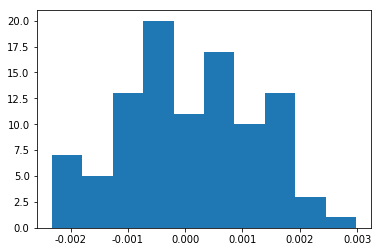

In [71]:
plt.hist(p_diffs);

j.  **p_diffs**列表的数值中，有多少比例的数值会大于 **ab_data.csv** 中观察到的实际**转化率差异** ？

In [72]:
# 理解后自己优化代码

# 临时测试代码
# XXXXXXXXXX_diffs 为实际观察到的转化差异，测试用变量名

# XXXXXXXXXX_diffs = df2.query('landing_page == "new_page"')['converted'].mean() - df2.query('landing_page == "old_page"')['converted'].mean()

# p_diffs = np.array(p_diffs)

# (p_diffs > XXXXXXXXXX_diffs).mean()

k. 用文字解释一下你刚才在 **j.** 中计算出来的结果。在数据研究中，这个值是什么？ 根据这个数值，请判断新旧页面的转化率是否有显著差异。

>- 写下你的理解

l. 我们也可以使用一个内置程序 （built-in）来实现类似的结果。使用内置程序可能很容易就能取得结果，但上面的内容仍然很重要，它可以训练你具有正确的数据统计思维。填写下面的内容来计算每个页面的转化次数，以及收到每个页面的用户数。计算新旧页面出现的次数，也就是数据中 `n_old` 与 `n_new` 分别出现的行数。

In [73]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"')['converted'].sum()
convert_new = df2.query('landing_page == "new_page"')['converted'].sum()
n_old = (df2['landing_page'] == 'old_page').sum()
n_new = (df2['landing_page'] == 'new_page').sum()

m. 现在使用 `stats.proportions_ztest` 来计算你的检验统计量与 p-值。[这里](http://knowledgetack.com/python/statsmodels/proportions_ztest/) 是使用内置程序的一个有用链接。

In [74]:
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old,n_new],alternative = 'smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. 根据上题算出的 z-score 和 p-value，你认为新旧页面的转化率是否有区别？它们与 **j.** 与 **k.** 问题中的结果一致吗？

>- 写下你的理解（结合 K 问题下方给到的参考资料）

<ul>
<li><a href="#00">返回课件目录</a></li>
</ul>